In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import load_iris

# import the ML algorithm
from sklearn.ensemble import RandomForestClassifier

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Following parameter settings we will try 

- (1) `RandomForestClassifier`(n_estimators=4, max_features=None, bootstrap=True, max_depth=3)

compare the tree0 and tree1, there most likely be difference in the features used for tree construction, boostrapping will cause data to be different

- (2) `RandomForestClassifier`(n_estimators=4, max_features=None, bootstrap= False, max_depth=3)

compare the tree0 and tree1, there most likely be NO difference in the features used for tree construction

- (3) `RandomForestClassifier`(n_estimators=4, max_features=None, bootstrap= False, max_depth=3, max_samples=.7)

compare the tree0 and tree1, there most likely be NO difference in the features used for tree construction

- (4) `RandomForestClassifier`(n_estimators=4, max_features=None, bootstrap= True, max_depth=3, max_samples=.7)

compare the tree0 and tree1, there most likely be difference in the features used for tree construction

In [24]:
## Instantiate the RF classifier
rfc = RandomForestClassifier(n_estimators = 4, 
                             max_features = 2, 
                             bootstrap    = True, 
                             max_depth    = 2,
                             #max_samples  = 1
                            )

In [25]:
# train the classifier
rfc.fit(X, y)
print(rfc.score(X, y))

0.96


In [26]:
rfc.estimators_

[DecisionTreeClassifier(max_depth=2, max_features=2, random_state=1650042360),
 DecisionTreeClassifier(max_depth=2, max_features=2, random_state=2070414249),
 DecisionTreeClassifier(max_depth=2, max_features=2, random_state=703782849),
 DecisionTreeClassifier(max_depth=2, max_features=2, random_state=1775503381)]

In [27]:
#!pip install pydotplus

In [28]:
import pydotplus
from IPython.display import Image  

from sklearn.tree import export_graphviz

In [29]:
# Extract single tree
len(rfc.estimators_)

4

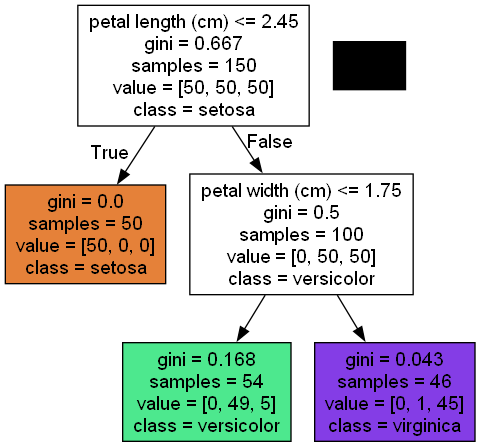

In [30]:
model = rfc.estimators_[0]

# Create DOT data
dot_data = export_graphviz(model,  
                           out_file=None, 
                           feature_names=iris.feature_names,
                           class_names  =iris.target_names,
                           filled       = True
                       )
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

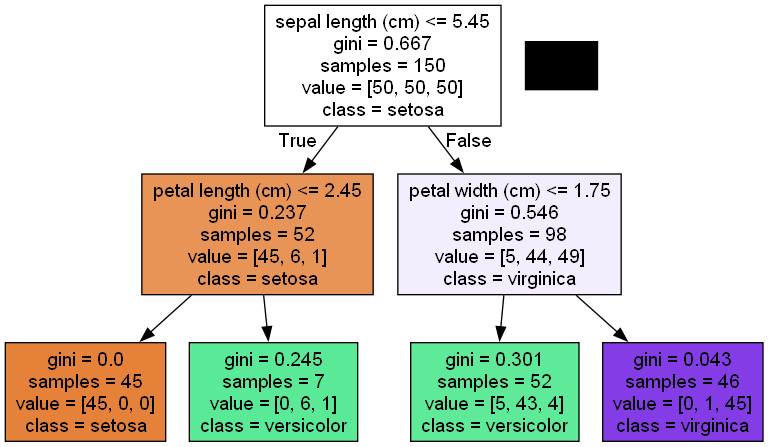

In [31]:
model = rfc.estimators_[1]

# Create DOT data
dot_data = export_graphviz(model, 
                            out_file=None, 
                            feature_names=iris.feature_names,
                            class_names  =iris.target_names,
                            filled       = True
                       )
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

-------------------------------------

In [14]:
for i, tree_in_forest in enumerate(rfc.estimators_):
    
    dot_file = export_graphviz(tree_in_forest, 
                               out_file=None,
                               feature_names=iris.feature_names,
                               class_names  =iris.target_names)

    graph = pydotplus.graph_from_dot_data(dot_file)    
   
    if i==1:
        break

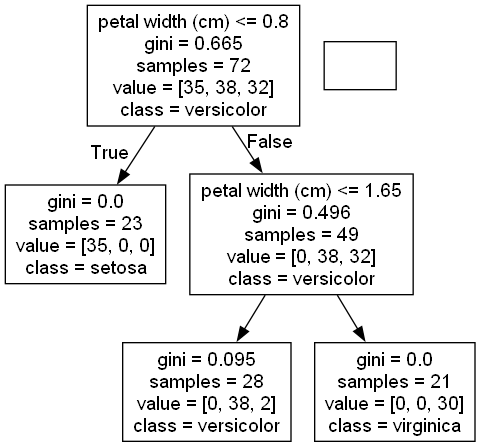

In [15]:
Image(graph.create_png())